In [ ]:
# import packages and libraries
import pandas as pd
import numpy as np
import zipfile
import os

In [ ]:
# Read in Data
!kaggle datasets download -d barelydedicated/bank-customer-churn-modeling

Dataset URL: https://www.kaggle.com/datasets/barelydedicated/bank-customer-churn-modeling
License(s): CC0-1.0
bank-customer-churn-modeling.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Path to Zip file
zip_path = r"C:\Users\HP USER\bank-customer-churn-modeling.zip"

In [ ]:
# Extract the zip content
extract_path = r"C:\Users\HP USER\bank-customer-churn-modeling"

In [ ]:
# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
# List all files in the extracted folder
print(os.listdir(extract_path))

['Churn_Modelling.csv']


In [ ]:
file_path = os.path.join(extract_path, "Churn_Modelling.csv")
df = pd.read_csv(file_path)

# Check the first few rows
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [ ]:
# Check for CreditScore values outside the valid range [300, 850]
invalid_creditscore = df[(df['CreditScore'] < 300) | (df['CreditScore'] > 850)]

print("Rows with invalid CreditScore values:")
if not invalid_creditscore.empty:
    print(invalid_creditscore[['CreditScore', 'CustomerId']])
else:
    print("No invalid CreditScore values found.")
print("-" * 50)

Rows with invalid CreditScore values:
No invalid CreditScore values found.
--------------------------------------------------


In [ ]:
# Check for unreasonable Age values
# Assuming a reasonable age is between 18 and 100 years.
invalid_age = df[(df['Age'] < 18) | (df['Age'] > 100)]

print("Rows with unreasonable Age values:")
if not invalid_age.empty:
    print(invalid_age[['Age', 'CustomerId']])
else:
    print("No unreasonable Age values found.")

Rows with unreasonable Age values:
No unreasonable Age values found.


In [ ]:
# Info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# From this table, we can confirm that the data has 14 features and 10,000 observations.
# We also know that nine features are integers, two are floats, and three are strings.
# Finally, we can tell that there are no null values because there are 10,000 observations,
# and each column has 10,000 non-null values.

In [ ]:
# Calculate the summarry statistics
df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary',
    'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']].describe()

,CreditScore,Age,Balance,EstimatedSalary,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,38.921800,76485.889288,100090.239881,5.012800,1.530200,0.70550,0.515100,0.203700
std,96.653299,10.487806,62397.405202,57510.492818,2.892174,0.581654,0.45584,0.499797,0.402769
min,350.000000,18.000000,0.000000,11.580000,0.000000,1.000000,0.00000,0.000000,0.000000
25%,584.000000,32.000000,0.000000,51002.110000,3.000000,1.000000,0.00000,0.000000,0.000000
50%,652.000000,37.000000,97198.540000,100193.915000,5.000000,1.000000,1.00000,1.000000,0.000000
75%,718.000000,44.000000,127644.240000,149388.247500,7.000000,2.000000,1.00000,1.000000,0.000000
max,850.000000,92.000000,250898.090000,199992.480000,10.000000,4.000000,1.00000,1.000000,1.000000


# The distribution is roughly normal or slightly left-skewed.
# Most credit scores are between 584 and 718, with a few low or high outliers.

In [ ]:
# Cap the outliers
cols_to_cap = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

for col in cols_to_cap:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)

In [ ]:
df[col]

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64

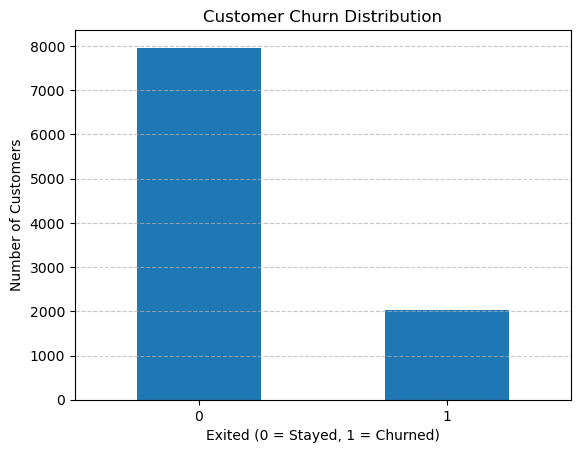

In [ ]:
# Import packages
import matplotlib.pyplot as plt

# Count the number of 0s and 1s in 'Exited'
exit_counts = df['Exited'].value_counts()

# Plot
exit_counts.plot(kind='bar')
plt.title('Customer Churn Distribution')
plt.xlabel('Exited (0 = Stayed, 1 = Churned)')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

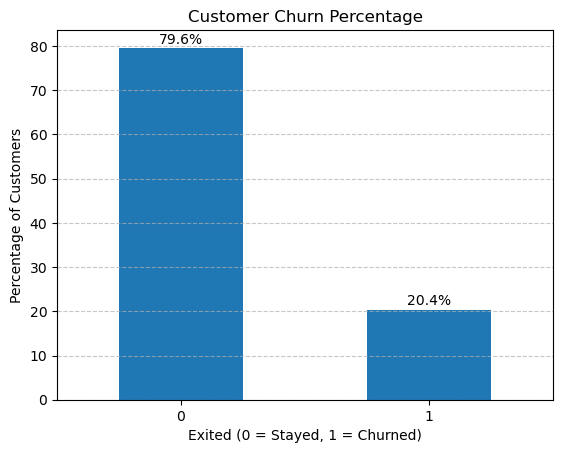

In [ ]:
# Percentage of churn versus retained
exit_counts = df['Exited'].value_counts(normalize=True) * 100  # Percent

exit_counts.plot(kind='bar')
plt.title('Customer Churn Percentage')
plt.xlabel('Exited (0 = Stayed, 1 = Churned)')
plt.ylabel('Percentage of Customers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add text labels on the bars
for i, val in enumerate(exit_counts):
    plt.text(i, val + 1, f"{val:.1f}%", ha='center')

plt.show()

In [ ]:
# Seventy nine percent of customers were retaine while only twenty percent were churned.

<AxesSubplot:xlabel='CreditScore', ylabel='Count'>

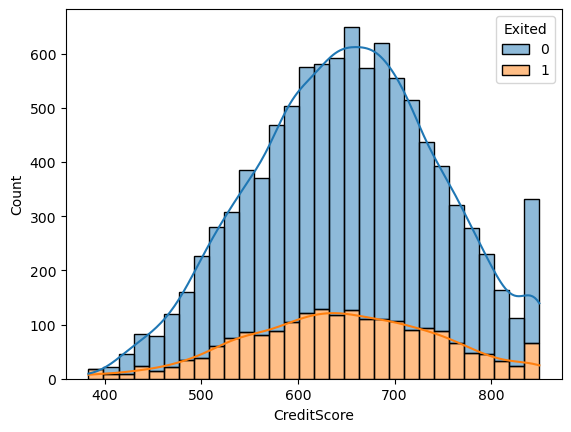

In [ ]:
# visualizations for features like: CreditScore, Age, Balance, EstimatedSalary, Tenure, NumOfProducts
import seaborn as sns
sns.histplot(data=df, x='CreditScore', hue='Exited', bins=30, kde=True, multiple='stack')

<AxesSubplot:xlabel='Age', ylabel='Count'>

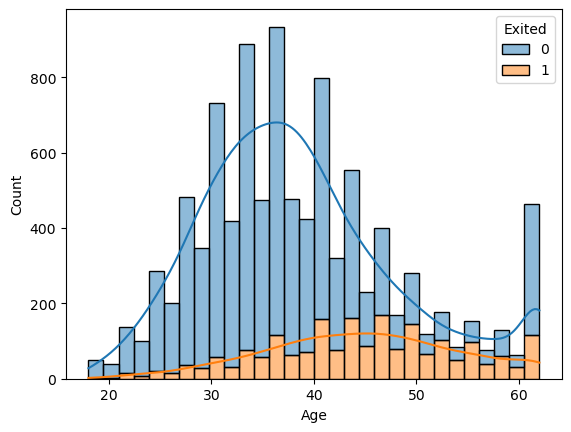

In [ ]:
sns.histplot(data=df, x='Age', hue='Exited', bins=30, kde=True, multiple='stack')

<AxesSubplot:xlabel='Balance', ylabel='Count'>

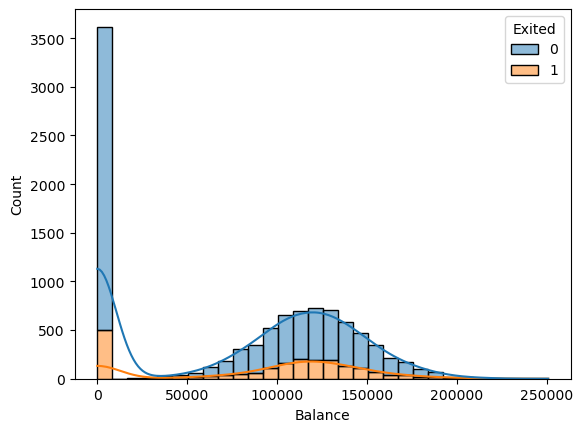

In [ ]:
sns.histplot(data=df, x='Balance', hue='Exited', bins=30, kde=True, multiple='stack')

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

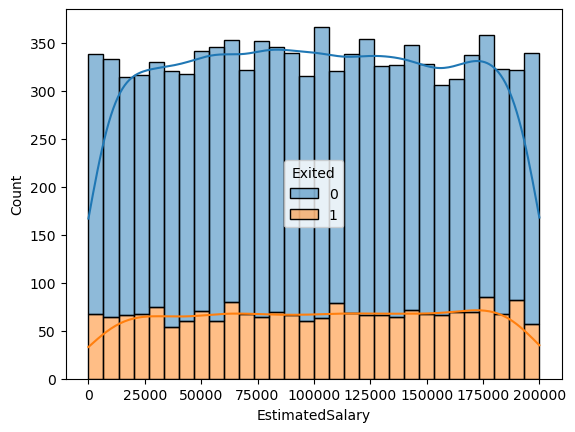

In [ ]:
sns.histplot(data=df, x='EstimatedSalary', hue='Exited', bins=30, kde=True, multiple='stack')

<AxesSubplot:xlabel='Tenure', ylabel='Count'>

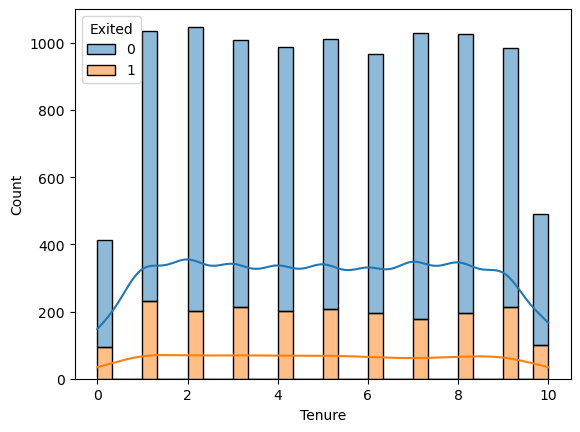

In [ ]:
sns.histplot(data=df, x='Tenure', hue='Exited', bins=30, kde=True, multiple='stack')

<AxesSubplot:xlabel='NumOfProducts', ylabel='Count'>

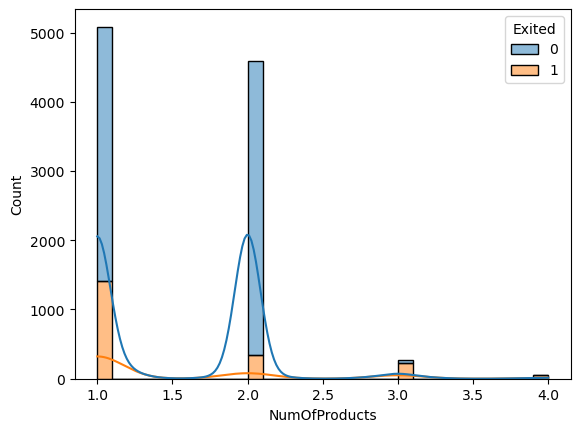

In [ ]:
sns.histplot(data=df, x='NumOfProducts', hue='Exited', bins=30, kde=True, multiple='stack')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Copy and encode
df_model = df.copy()

In [ ]:
# Encode categorical variables
le = LabelEncoder()
df_model['Gender'] = le.fit_transform(df_model['Gender'])  # Male = 1, Female = 0
df_model['Geography'] = le.fit_transform(df_model['Geography'])  # Label encode countries

# Define features and target
X = df_model.drop(['Exited', 'CustomerId', 'Surname', 'RowNumber'], axis=1)
y = df_model['Exited']

# Train -test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

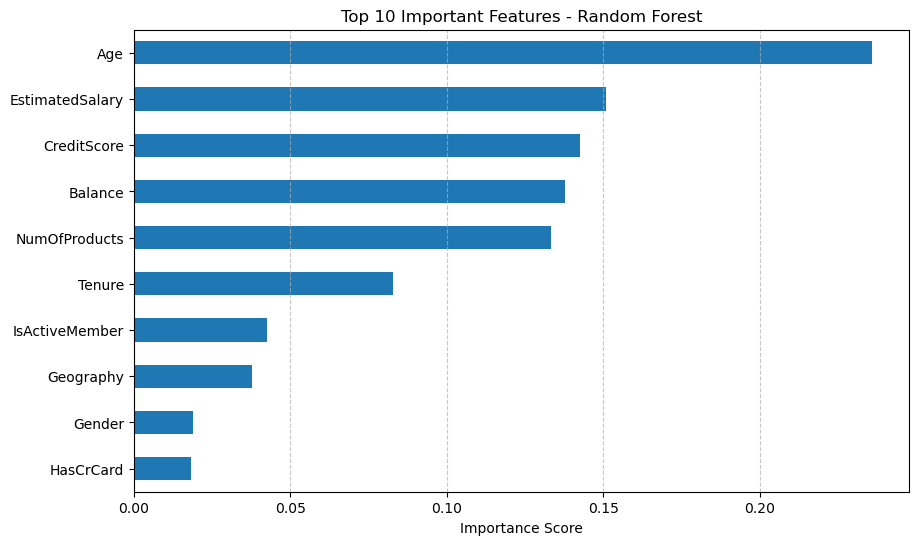

In [ ]:
# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
feature_importances.head(10).plot(kind='barh')
plt.title('Top 10 Important Features - Random Forest')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Checking churn rates by age group.

# Create age bins
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, 100], labels=['<30', '30–40', '40–50', '50–60', '60+'])

# Calculate churn rate by age group
churn_by_age = df.groupby('AgeGroup')['Exited'].mean() * 100

print(churn_by_age)

AgeGroup
<30       7.520325
30–40    12.087171
40–50    33.965517
50–60    56.210790
60+      24.784483
Name: Exited, dtype: float64


# That shows churn rate increases with age, which would explain why Age is so important.
# Age is important because it strongly correlates with churn behavior.

# The model picks up on these patterns and uses them to make better splits and predictions.

In [ ]:
df['Age'].mean()

38.6608

In [ ]:
# The average of customer is roughly thirty nine years(12.09). This is far better.

In [ ]:
(df['Age'] > 39) & (df['Balance'] > 100000)

0       False
1       False
2        True
3       False
4        True
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

# They’re financially valuable (high balance = high lifetime value).
# If they churn, the cost to replace them is a little bit low.

In [ ]:
# Our model revealed that customers over 39 with balances above ₦100,000 are not likely to churn.
# These are high-value accounts.